## 📘 Step 1: Importing the Essentials

Before we get into the data, let’s bring in all the libraries that will help us throughout this project — from reading and analyzing data to building and evaluating the machine learning model.

In [1]:
# Let's bring in all the tools we'll need!
import pandas as pd  # For handling tabular data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns  # For pretty statistical plots
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.preprocessing import LabelEncoder, StandardScaler  # For encoding and scaling
from sklearn.linear_model import LogisticRegression  # Our chosen ML model
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix  # For evaluation

# Just a style tweak for seaborn visuals
sns.set(style="whitegrid")


## 📊 Step 2: Loading the Dataset
Time to bring in our dataset! This data contains user details like age, salary, and whether they made a purchase. Let’s load it in and take a quick peek to understand its structure.

In [14]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Social_Network_Ads.csv")
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## 🧐 Step 3: Initial Exploration
A good practice is to always understand your dataset's structure before jumping into modeling. We’ll check for missing values, column types, and general info to ensure everything is in order.

In [3]:
# Let's get a quick overview
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


## 📈 Step 4: Exploring the Data Visually (EDA)
Here we dive into the data through plots to understand key patterns and relationships. We’ll explore:

-Gender distribution

-Purchase behavior

-Age and salary comparisons

-Relationships between variables using a pairplot

-This helps us uncover any early trends that might be useful later.

/tmp/ipython-input-4-1002202918.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='pastel')


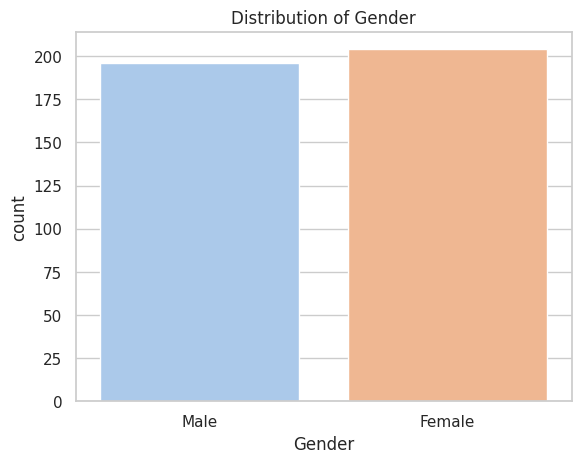

In [4]:
# Let's visualize the gender distribution
sns.countplot(x='Gender', data=df, palette='pastel')
plt.title("Distribution of Gender")
plt.show()

/tmp/ipython-input-5-3711715077.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Purchased', data=df, palette='coolwarm')


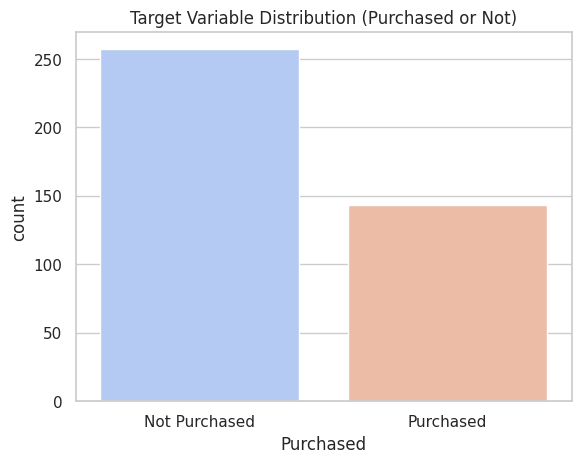

In [5]:
# Purchase distribution (target class balance)
sns.countplot(x='Purchased', data=df, palette='coolwarm')
plt.title("Target Variable Distribution (Purchased or Not)")
plt.xticks([0, 1], ['Not Purchased', 'Purchased'])
plt.show()

/tmp/ipython-input-6-950769015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased', y='Age', data=df, palette='Set2')


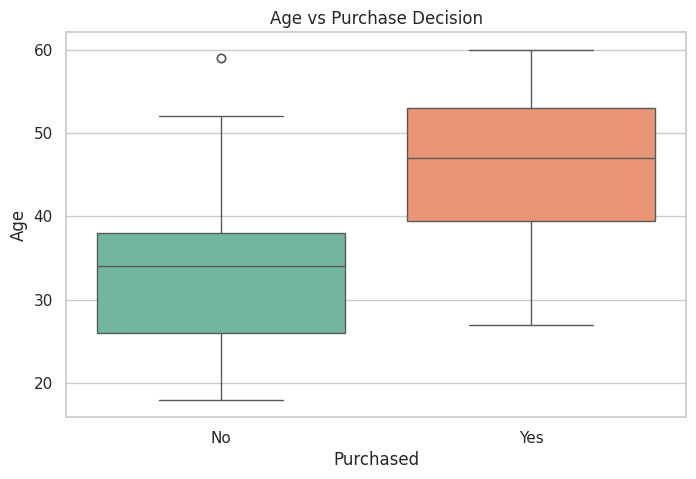

In [6]:
# Age vs Purchased
plt.figure(figsize=(8,5))
sns.boxplot(x='Purchased', y='Age', data=df, palette='Set2')
plt.title('Age vs Purchase Decision')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

/tmp/ipython-input-7-2783564337.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette='Set3')


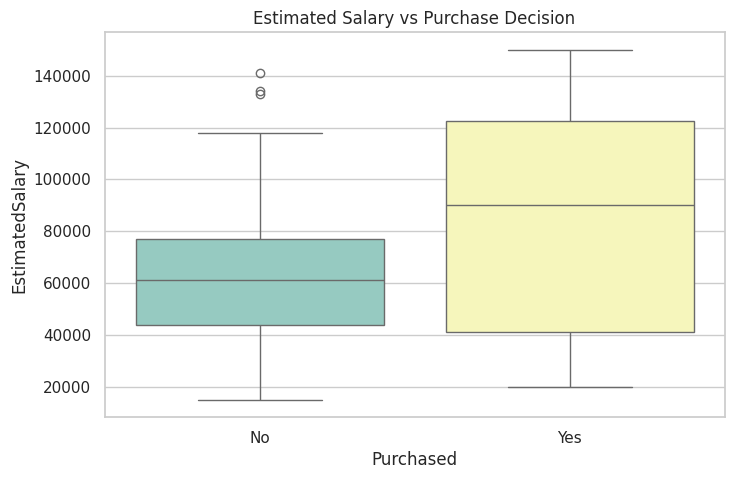

In [7]:
# Estimated Salary vs Purchased
plt.figure(figsize=(8,5))
sns.boxplot(x='Purchased', y='EstimatedSalary', data=df, palette='Set3')
plt.title('Estimated Salary vs Purchase Decision')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

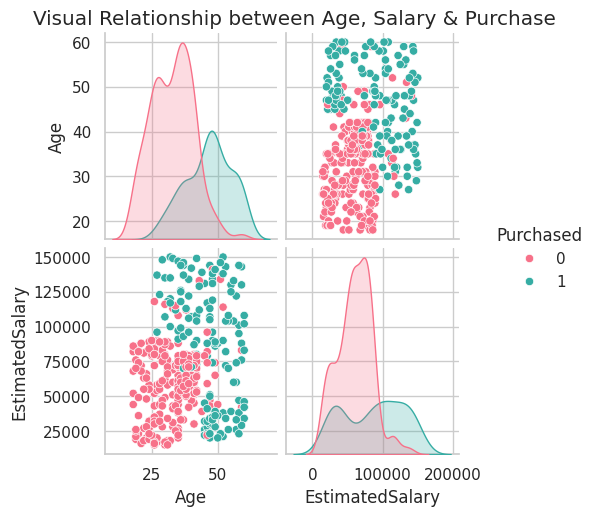

In [8]:
# Pairplot for relationships
sns.pairplot(df[['Age', 'EstimatedSalary', 'Purchased']], hue='Purchased', palette='husl')
plt.suptitle("Visual Relationship between Age, Salary & Purchase", y=1.02)
plt.show()

## 🔄 Step 5: Preparing the Data
To get our dataset model-ready, we’ll:

-Drop irrelevant columns

-Convert categorical text into numerical values

-Scale features so they're on the same level

-Split our data into training and test sets

-Clean and prepped data is half the battle in machine learning!

In [15]:
# Drop User ID as it's not useful for prediction
df.drop('User ID', axis=1, inplace=True)

# Encode Gender column (Male=1, Female=0)
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Separate features and target
X = df.drop('Purchased', axis=1)
y = df['Purchased']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## 🤖 Step 6: Training the Logistic Regression Model
Let’s put our data to work! We’ll use Logistic Regression, a simple but powerful classification algorithm, to learn patterns from our training data and distinguish between buyers and non-buyers.

In [10]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## 📊 Step 7: Making Predictions & Evaluating the Model
Now that the model is trained, it’s time to see how well it performs. We'll use accuracy, precision, recall, and F1-score to get a complete picture of our model's effectiveness on unseen data.

In [11]:
# Predict on the test data
y_pred = model.predict(X_test)

# Print evaluation metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.8875

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



## 🔍 Step 8: Understanding Predictions with a Confusion Matrix
A confusion matrix helps break down the model's predictions: how many it got right, and where it went wrong. This visual gives us a clear view of how balanced the model is when predicting both classes.

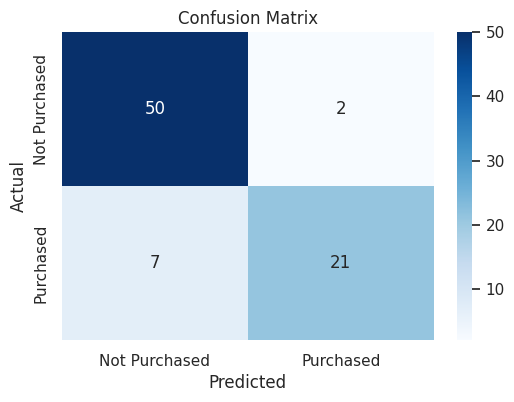

In [12]:
# Visualize confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Purchased', 'Purchased'], yticklabels=['Not Purchased', 'Purchased'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## 🌈 Step 9: Visualizing the Decision Boundary
Finally, we’ll visualize the model's decision-making. By plotting a decision boundary, we can see how well the model separates the two classes (Purchased vs. Not Purchased) using Age and Salary. It’s a great sanity check and a beautiful way to wrap up the project!

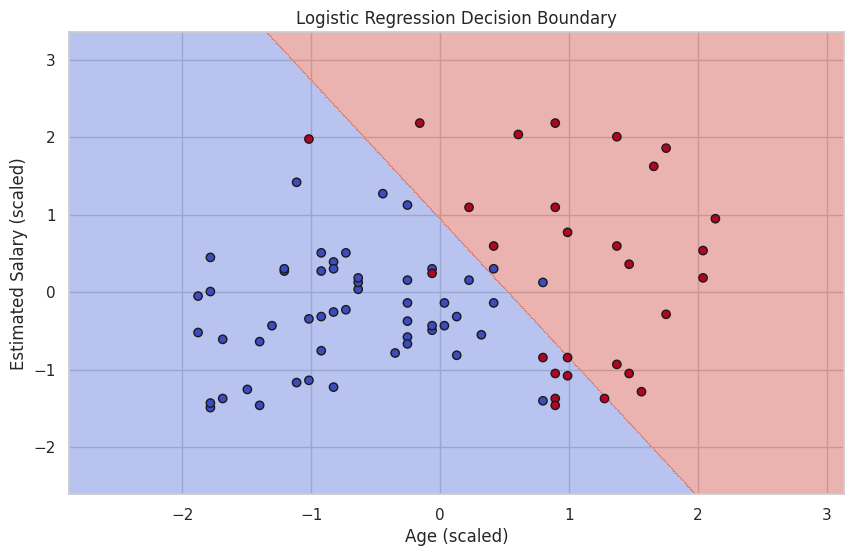

In [13]:
# Use only Age and Salary for 2D plotting
X_vis = df[['Age', 'EstimatedSalary']]
X_vis_scaled = scaler.fit_transform(X_vis)
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis_scaled, y, test_size=0.2, random_state=42)

model_vis = LogisticRegression()
model_vis.fit(X_train_vis, y_train_vis)

# Create a mesh grid
x_min, x_max = X_vis_scaled[:, 0].min() - 1, X_vis_scaled[:, 0].max() + 1
y_min, y_max = X_vis_scaled[:, 1].min() - 1, X_vis_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Plot the decision boundary
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test_vis, marker='o', edgecolors='k', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age (scaled)')
plt.ylabel('Estimated Salary (scaled)')
plt.show()


In [16]:
import joblib

# Save the trained model
joblib.dump(model, 'logistic_model.pkl')

# Save the scaler (
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder
joblib.dump(le, 'label_encoder.pkl')


['label_encoder.pkl']